In [4]:
import pandas as pd

In [5]:
import csv, os
#function to read the excel files
def read_file(directory):
    dfs=[]
    splitslash=directory.split('/')[-1]
    for file in os.listdir(directory):  
        x=directory+'/'+file
        if splitslash=="bending2" and file=="dataset4.csv":
            dat=clean_dataset4(x)
            dfs.append(dat)
            continue
        data=pd.read_csv(x,skiprows=4)
        dfs.append(data)
    df=pd.concat(dfs)
    return df
        


In [6]:
def clean_dataset4(file):
    temp=pd.read_csv(file,skiprows=4)
    temp2=temp.iloc[:,0].str.split(" ",n=6,expand=True)
    temp.iloc[:,0]=temp2[0]
    temp.iloc[:,1]=temp2[1]
    temp.iloc[:,2]=temp2[2]    
    temp.iloc[:,3]=temp2[3]
    temp.iloc[:,4]=temp2[4]
    temp.iloc[:,5]=temp2[5]
    temp.iloc[:,6]=temp2[6]
    temp=temp.astype(float)
    return temp
    
    

In [7]:
#reading bending1 folder
path='C:/Users/Shivani/bending1'
bending1_df=read_file(path)


In [8]:
#reading bending1 folder
path='C:/Users/Shivani/bending2'
bending2_df=read_file(path)

In [9]:
#reading walking folder
path='C:/Users/Shivani/walking'
walking_df=read_file(path)

In [10]:
#reading lying folder
path='C:/Users/Shivani/lying'
lying_df=read_file(path)

In [11]:
#reading sitting folder
path='C:/Users/Shivani/sitting'
sitting_df=read_file(path)

In [12]:
#reading standing folder
path='C:/Users/Shivani/standing'
standing_df=read_file(path)

In [13]:
#reading cycling folder
path='C:/Users/Shivani/cycling'
cycling_df=read_file(path)

In [14]:
#function to read only dataset 1 n 2 from bending folders for test data
def read_file_bending(directory):
    dataframes1=[]
    for file in os.listdir(directory):
        x=directory+'/'+file
        if "dataset1" in file or "dataset2" in file:
            data=pd.read_csv(x,skiprows=4)
            dataframes1.append(data)
    df1=pd.concat(dataframes1)
    return df1
        


In [15]:
path='C:/Users/Shivani/bending1'
bending_df=read_file_bending(path)

In [16]:
path='C:/Users/Shivani/bending2'
bending_df2=read_file_bending(path)

In [17]:
#function to read dataset1,2 and 3 from other folders as test data
def read_file_other(directory):
    dataframes2=[]
    for file in os.listdir(directory):
        x=directory+'/'+file
        if file=="dataset1.csv" or file=="dataset2.csv" or file== "dataset3.csv":
            data=pd.read_csv(x,skiprows=4)
            dataframes2.append(data)
    df2=pd.concat(dataframes2)
    return df2
        


In [18]:
path='C:/Users/Shivani/walking'
o1=read_file_other(path)

In [19]:
path='C:/Users/Shivani/lying'
o2=read_file_other(path)

In [20]:
path='C:/Users/Shivani/sitting'
o3=read_file_other(path)

In [21]:
path='C:/Users/Shivani/standing'
o4=read_file_other(path)

In [22]:
path='C:/Users/Shivani/cycling'
o5=read_file_other(path)

In [23]:
testdata=pd.concat([bending_df,bending_df2,o1,o2,o3,o4,o5])

In [24]:
#function to read the rest of the files in bending folders for training data
def read_file_bending_tr(directory):
    dfs2=[]
    splitslash=directory.split('/')[-1]
    for file in os.listdir(directory):
        x=directory+'/'+file
        if "dataset1" in file or "dataset2" in file:
            continue
        elif splitslash=="bending2" and file=="dataset4.csv":
            dat=clean_dataset4(x)
            dfs2.append(dat)
            continue
        datanew=pd.read_csv(x,skiprows=4)
        dfs2.append(datanew)
    dfnew=pd.concat(dfs2)
    return dfnew,dfs2
        


In [25]:
path='C:/Users/Shivani/bending1'
bending_df_tr,bending_df_tr_list=read_file_bending_tr(path)


In [26]:
path='C:/Users/Shivani/bending2'
bending_df2_tr,bending_df2_tr_list=read_file_bending_tr(path)

In [27]:
#function to read the rest of the files from rest of the folders for training data
def read_file_other_tr(directory):
    dataframes3=[]
    for file in os.listdir(directory):
        x=directory+'/'+file
        if file=="dataset1.csv" or file=="dataset2.csv" or file== "dataset3.csv":
            continue
        datanew2=pd.read_csv(x,skiprows=4)
        dataframes3.append(datanew2)
    df3=pd.concat(dataframes3)
    return df3,dataframes3
        

In [28]:
path='C:/Users/Shivani/walking'
o1_tr,o1_tr_list=read_file_other_tr(path)

In [29]:
path='C:/Users/Shivani/lying'
o2_tr,o2_tr_list=read_file_other_tr(path)

In [30]:
path='C:/Users/Shivani/sitting'
o3_tr,o3_tr_list=read_file_other_tr(path)

In [432]:
len(o3_tr_list)

12

In [31]:
path='C:/Users/Shivani/standing'
o4_tr,o4_tr_list=read_file_other_tr(path)

In [32]:
path='C:/Users/Shivani/cycling'
o5_tr,o5_tr_list=read_file_other_tr(path)

In [33]:
traindata_list=[bending_df_tr_list,bending_df2_tr_list,o1_tr_list,o2_tr_list,o3_tr_list,o4_tr_list,o5_tr_list]

In [34]:
traindata=pd.concat([bending_df_tr,bending_df2_tr,o1_tr,o2_tr,o3_tr,o4_tr,o5_tr])

In [431]:
traindata

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,42.00,0.71,21.25,0.43,30.00,0.00
1,250.0,41.50,0.50,20.25,1.48,31.25,1.09
2,500.0,41.50,0.50,14.25,1.92,33.00,0.00
3,750.0,40.75,0.83,15.75,0.43,33.00,0.00
4,1000.0,40.00,0.71,20.00,2.74,32.75,0.43
5,1250.0,41.25,0.83,24.25,0.43,31.50,0.87
6,1500.0,42.25,0.43,23.75,0.43,35.25,1.30
7,1750.0,43.50,0.87,21.00,0.00,36.00,0.00
8,2000.0,42.75,0.83,21.25,0.43,36.00,0.00
9,2250.0,43.25,0.43,23.75,0.43,36.00,0.00


In [36]:
all_df=pd.concat([bending1_df,bending2_df,cycling_df,lying_df,sitting_df,standing_df,walking_df])

In [37]:
all_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,39.25,0.43,22.75,0.43,33.75,1.30
1,250.0,39.25,0.43,23.00,0.00,33.00,0.00
2,500.0,39.25,0.43,23.25,0.43,33.00,0.00
3,750.0,39.50,0.50,23.00,0.71,33.00,0.00
4,1000.0,39.50,0.50,24.00,0.00,33.00,0.00
5,1250.0,39.25,0.43,24.00,0.00,33.00,0.00
6,1500.0,39.25,0.43,24.00,0.00,33.00,0.00
7,1750.0,39.00,0.00,23.75,0.43,33.00,0.00
8,2000.0,39.50,0.50,24.00,0.00,33.00,0.00
9,2250.0,39.50,0.50,23.00,0.00,33.00,0.00


In [38]:
#function to load each instance of bending1 activity
def load_data_bending1(directory):
    c=1
    data_store=[]
    while c<8:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        dataset=pd.read_csv(x,skiprows=4)
        #print(dataset)
        #print(c)
        data_store.append(dataset)
        c=c+1
            

    return data_store

In [39]:
path='C:/Users/Shivani/bending1'
d1=load_data_bending1(path)


In [40]:
def load_data_bending2(directory):
    c=1
    data_store=[]
    splitslash=directory.split('/')[-1]
    while c<7:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        if splitslash=="bending2" and file[0]=="dataset4.csv":
            dat=clean_dataset4(x)
            data_store.append(dat)
            c=c+1
            continue
        dataset=pd.read_csv(x,skiprows=4)
        #print(dataset)
        #print(c)
        data_store.append(dataset)
        c=c+1
            

    return data_store

In [41]:
path='C:/Users/Shivani/bending2'
d2=load_data_bending2(path)


In [42]:
def load_data_rest(directory):
    c=1
    data_store=[]
    while c<16:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        dataset=pd.read_csv(x,skiprows=4)
        #print(dataset)
        #print(c)
        data_store.append(dataset)
        c=c+1
            

    return data_store

In [43]:
path='C:/Users/Shivani/cycling'
d3=load_data_rest(path)

In [44]:
path='C:/Users/Shivani/lying'
d4=load_data_rest(path)


In [45]:
path='C:/Users/Shivani/sitting'
d5=load_data_rest(path)


In [46]:
path='C:/Users/Shivani/standing'
d6=load_data_rest(path)


In [47]:
path='C:/Users/Shivani/walking'
d7=load_data_rest(path)


In [48]:
import numpy as np

In [49]:
#function to find out the statistical values for all of the 6 time series in every instance
def stats(list_of_df):
    df=[]
    for dataset in list_of_df:
        dataset['min1']=dataset['avg_rss12'].min()
        dataset['min2']=dataset['var_rss12'].min()
        dataset['min3']=dataset['avg_rss13'].min()
        dataset['min4']=dataset['var_rss13'].min()
        dataset['min5']=dataset['avg_rss23'].min()
        dataset['min6']=dataset['var_rss23'].min()
        dataset['max1']=dataset['avg_rss12'].max()
        dataset['max2']=dataset['var_rss12'].max()
        dataset['max3']=dataset['avg_rss13'].max()
        dataset['max4']=dataset['var_rss13'].max()
        dataset['max5']=dataset['avg_rss23'].max()
        dataset['max6']=dataset['var_rss23'].max()
        dataset['mean1']=dataset['avg_rss12'].mean()
        dataset['mean2']=dataset['var_rss12'].mean()
        dataset['mean3']=dataset['avg_rss13'].mean()
        dataset['mean4']=dataset['var_rss13'].mean()
        dataset['mean5']=dataset['avg_rss23'].mean()
        dataset['mean6']=dataset['var_rss23'].mean()
        dataset['median1']=dataset['avg_rss12'].median()
        dataset['median2']=dataset['var_rss12'].median()
        dataset['median3']=dataset['avg_rss13'].median()
        dataset['median4']=dataset['var_rss13'].median()
        dataset['median5']=dataset['avg_rss23'].median()
        dataset['median6']=dataset['var_rss23'].median()
        dataset['std1']=np.std(dataset['avg_rss12'])
        dataset['std2']=np.std(dataset['var_rss12'])
        dataset['std3']=np.std(dataset['avg_rss13'])
        dataset['std4']=np.std(dataset['var_rss13'])
        dataset['std5']=np.std(dataset['avg_rss23'])
        dataset['std6']=np.std(dataset['var_rss23'])
        dataset['1st quart1']=np.percentile(dataset['avg_rss12'],(25))
        dataset['1st quart2']=np.percentile(dataset['var_rss12'],(25))
        dataset['1st quart3']=np.percentile(dataset['avg_rss13'],(25))
        dataset['1st quart4']=np.percentile(dataset['var_rss13'],(25))
        dataset['1st quart5']=np.percentile(dataset['avg_rss23'],(25))
        dataset['1st quart6']=np.percentile(dataset['var_rss23'],(25))
        dataset['3rd quart1']=np.percentile(dataset['avg_rss12'],(75))
        dataset['3rd quart2']=np.percentile(dataset['var_rss12'],(75))
        dataset['3rd quart3']=np.percentile(dataset['avg_rss13'],(75))
        dataset['3rd quart4']=np.percentile(dataset['var_rss13'],(75))
        dataset['3rd quart5']=np.percentile(dataset['avg_rss23'],(75))
        dataset['3rd quart6']=np.percentile(dataset['var_rss23'],(75))
        df.append(dataset)
    return df
        
        

In [50]:
r1=stats(d1)
print(r1)

[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      39.25       0.43      22.75       0.43      33.75   
1                250      39.25       0.43      23.00       0.00      33.00   
2                500      39.25       0.43      23.25       0.43      33.00   
3                750      39.50       0.50      23.00       0.71      33.00   
4               1000      39.50       0.50      24.00       0.00      33.00   
5               1250      39.25       0.43      24.00       0.00      33.00   
6               1500      39.25       0.43      24.00       0.00      33.00   
7               1750      39.00       0.00      23.75       0.43      33.00   
8               2000      39.50       0.50      24.00       0.00      33.00   
9               2250      39.50       0.50      23.00       0.00      33.00   
10              2500      39.50       0.50      23.25       0.43      33.00   
11              2750      39.50       0.50      23.

In [51]:
r11=r1[0].iloc[0:1,7:]
r12=r1[1].iloc[0:1,7:]
r13=r1[2].iloc[0:1,7:]
r14=r1[3].iloc[0:1,7:]
r15=r1[4].iloc[0:1,7:]
r16=r1[5].iloc[0:1,7:]
r17=r1[6].iloc[0:1,7:]
temp1=pd.concat([r11,r12,r13,r14,r15,r16,r17]) #creating a dataframe of statistical values for bending1

In [52]:
r2=stats(d2)
r21=r2[0].iloc[0:1,7:]
r22=r2[1].iloc[0:1,7:]
r23=r2[2].iloc[0:1,7:]
r24=r2[3].iloc[0:1,7:]
r25=r2[4].iloc[0:1,7:]
r26=r2[5].iloc[0:1,7:]
temp2=pd.concat([r21,r22,r23,r24,r25,r26]) #creating a dataframe of statistical values for bending2

In [53]:
r3=stats(d3)
r31=r3[0].iloc[0:1,7:]
r32=r3[1].iloc[0:1,7:]
r33=r3[2].iloc[0:1,7:]
r34=r3[3].iloc[0:1,7:]
r35=r3[4].iloc[0:1,7:]
r36=r3[5].iloc[0:1,7:]
r37=r3[6].iloc[0:1,7:]
r38=r3[7].iloc[0:1,7:]
r39=r3[8].iloc[0:1,7:]
r310=r3[9].iloc[0:1,7:]
r311=r3[10].iloc[0:1,7:]
r312=r3[11].iloc[0:1,7:]
r313=r3[12].iloc[0:1,7:]
r314=r3[13].iloc[0:1,7:]
r315=r3[14].iloc[0:1,7:]
temp3=pd.concat([r31,r32,r33,r34,r35,r36,r37,r38,r39,r310,r311,r312,r313,r314,r315]) #creating a dataframe of statistical values for cycling

In [54]:
r4=stats(d4)
r41=r4[0].iloc[0:1,7:]
r42=r4[1].iloc[0:1,7:]
r43=r4[2].iloc[0:1,7:]
r44=r4[3].iloc[0:1,7:]
r45=r4[4].iloc[0:1,7:]
r46=r4[5].iloc[0:1,7:]
r47=r4[6].iloc[0:1,7:]
r48=r4[7].iloc[0:1,7:]
r49=r4[8].iloc[0:1,7:]
r410=r4[9].iloc[0:1,7:]
r411=r4[10].iloc[0:1,7:]
r412=r4[11].iloc[0:1,7:]
r413=r4[12].iloc[0:1,7:]
r414=r4[13].iloc[0:1,7:]
r415=r4[14].iloc[0:1,7:]
temp4=pd.concat([r41,r42,r43,r44,r45,r46,r47,r48,r49,r410,r411,r412,r413,r414,r415]) #creating a dataframe of statistical values for lying

In [55]:
r5=stats(d5)
r51=r5[0].iloc[0:1,7:]
r52=r5[1].iloc[0:1,7:]
r53=r5[2].iloc[0:1,7:]
r54=r5[3].iloc[0:1,7:]
r55=r5[4].iloc[0:1,7:]
r56=r5[5].iloc[0:1,7:]
r57=r5[6].iloc[0:1,7:]
r58=r5[7].iloc[0:1,7:]
r59=r5[8].iloc[0:1,7:]
r510=r5[9].iloc[0:1,7:]
r511=r5[10].iloc[0:1,7:]
r512=r5[11].iloc[0:1,7:]
r513=r5[12].iloc[0:1,7:]
r514=r5[13].iloc[0:1,7:]
r515=r5[14].iloc[0:1,7:]
temp5=pd.concat([r51,r52,r53,r54,r55,r56,r57,r58,r59,r510,r511,r512,r513,r514,r515]) #creating a dataframe of statistical values for sitting

In [56]:
r6=stats(d6)
r61=r6[0].iloc[0:1,7:]
r62=r6[1].iloc[0:1,7:]
r63=r6[2].iloc[0:1,7:]
r64=r6[3].iloc[0:1,7:]
r65=r6[4].iloc[0:1,7:]
r66=r6[5].iloc[0:1,7:]
r67=r6[6].iloc[0:1,7:]
r68=r6[7].iloc[0:1,7:]
r69=r6[8].iloc[0:1,7:]
r610=r6[9].iloc[0:1,7:]
r611=r6[10].iloc[0:1,7:]
r612=r6[11].iloc[0:1,7:]
r613=r6[12].iloc[0:1,7:]
r614=r6[13].iloc[0:1,7:]
r615=r6[14].iloc[0:1,7:]
temp6=pd.concat([r61,r62,r63,r64,r65,r66,r67,r68,r69,r610,r611,r612,r613,r614,r615]) #creating a dataframe of statistical values for standing


In [57]:
r7=stats(d7)
r71=r7[0].iloc[0:1,7:]
r72=r7[1].iloc[0:1,7:]
r73=r7[2].iloc[0:1,7:]
r74=r7[3].iloc[0:1,7:]
r75=r7[4].iloc[0:1,7:]
r76=r7[5].iloc[0:1,7:]
r77=r7[6].iloc[0:1,7:]
r78=r7[7].iloc[0:1,7:]
r79=r7[8].iloc[0:1,7:]
r710=r7[9].iloc[0:1,7:]
r711=r7[10].iloc[0:1,7:]
r712=r7[11].iloc[0:1,7:]
r713=r7[12].iloc[0:1,7:]
r714=r7[13].iloc[0:1,7:]
r715=r7[14].iloc[0:1,7:]
temp7=pd.concat([r71,r72,r73,r74,r75,r76,r77,r78,r79,r710,r711,r712,r713,r714,r715]) #creating a dataframe of statistical values for walking

In [58]:
feat_df=pd.concat([temp1,temp2,temp3,temp4,temp5,temp6,temp7]) #combining each of the dataframes to get a df consisting of features for all 88 instances

In [59]:
print(feat_df)

     min1  min2  min3  min4   min5  min6   max1   max2   max3   max4  \
0   37.25   0.0  4.00   0.0  27.25  0.00  45.00   1.30  29.50   7.23   
0   38.00   0.0  2.00   0.0  27.67  0.00  45.67   1.22  29.50   5.76   
0   35.00   0.0  6.50   0.0  29.00  0.00  47.40   1.70  29.75   4.44   
0   33.00   0.0  8.50   0.0  20.00  0.00  47.75   3.00  30.00   5.15   
0   33.00   0.0  3.00   0.0  23.67  0.00  45.75   2.83  28.25   6.42   
0   37.00   0.0  5.75   0.0   8.00  0.00  48.00   1.58  27.00  10.03   
0   36.25   0.0  1.50   0.0  11.33  0.00  48.00   1.50  26.33   5.17   
0   12.75   0.0  0.00   0.0  10.67  0.00  51.00   6.87  25.33   6.76   
0    0.00   0.0  7.50   0.0   0.00  0.00  42.75   7.76  35.00   5.76   
0   21.00   0.0  0.00   0.0   5.00  0.00  50.00   9.90  28.25   7.40   
0   27.50   0.0  0.00   0.0  11.00  0.00  33.00   1.00  14.50   4.44   
0   19.00   0.0  0.00   0.0   1.67  0.00  45.50   6.40  32.75  11.42   
0   25.00   0.0  2.00   0.0   0.00  0.00  47.50   6.38  28.33   

In [60]:
feat_df['Instance']=list(range(1,89))

In [61]:
feat_df=feat_df.set_index("Instance") #setting index of dataframe to Instance

In [62]:
feat_df #dataframe after extracting features for 6 time series for every instance

,min1,min2,min3,min4,min5,min6,max1,max2,max3,max4,...,1st quart3,1st quart4,1st quart5,1st quart6,3rd quart1,3rd quart2,3rd quart3,3rd quart4,3rd quart5,3rd quart6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,0.0,4.00,0.0,27.25,0.00,45.00,1.30,29.50,7.23,...,16.0000,0.0000,33.0000,0.0000,42.0000,0.5000,23.2500,1.1200,36.0000,1.3000
2,38.00,0.0,2.00,0.0,27.67,0.00,45.67,1.22,29.50,5.76,...,19.0000,0.0000,32.0000,0.0000,43.6700,0.5000,22.2500,1.1450,34.5000,1.3000
3,35.00,0.0,6.50,0.0,29.00,0.00,47.40,1.70,29.75,4.44,...,19.7500,0.0000,35.3625,0.0000,45.0000,0.5000,24.0000,0.8300,36.5000,0.9400
4,33.00,0.0,8.50,0.0,20.00,0.00,47.75,3.00,30.00,5.15,...,20.5000,0.4300,30.4575,0.0000,45.0000,1.1200,24.3725,1.3000,36.3300,1.0000
5,33.00,0.0,3.00,0.0,23.67,0.00,45.75,2.83,28.25,6.42,...,16.5000,0.4300,28.4575,0.0000,42.7500,0.7100,22.0625,1.1200,31.2500,0.5000
6,37.00,0.0,5.75,0.0,8.00,0.00,48.00,1.58,27.00,10.03,...,13.0000,0.4300,22.2500,0.4300,45.0000,0.5000,18.2700,1.1200,24.0000,0.8700
7,36.25,0.0,1.50,0.0,11.33,0.00,48.00,1.50,26.33,5.17,...,14.2500,0.0000,20.5000,0.0000,44.6700,0.5000,18.0000,0.9400,23.7500,0.8300
8,12.75,0.0,0.00,0.0,10.67,0.00,51.00,6.87,25.33,6.76,...,18.0000,0.0000,20.5000,0.4300,26.5000,0.7100,22.0000,0.8700,27.0000,0.8700
9,0.00,0.0,7.50,0.0,0.00,0.00,42.75,7.76,35.00,5.76,...,18.0000,0.0000,15.0000,0.4700,30.0000,0.5000,22.5000,0.9400,20.7500,1.3000


In [63]:
standard_deviation=dict()
for column in feat_df:
    standard_deviation[column]=np.std(feat_df[column]) #finding the standard deviation of each of the time-domain features extracted from the data
from operator import itemgetter
print(sorted(standard_deviation.items(),key=itemgetter(1)))
    

[('min2', 0.0), ('min4', 0.0), ('min6', 0.045576965827593074), ('std4', 0.45515576231996047), ('std6', 0.5141316816102194), ('1st quart6', 0.754261365241397), ('1st quart4', 0.8388126951078968), ('std2', 0.8781516314077896), ('std3', 0.9403347763270604), ('1st quart2', 0.9409936333203218), ('std5', 1.0179958541711265), ('median6', 1.080283538057551), ('median4', 1.139058054228987), ('mean6', 1.1482317454684954), ('mean4', 1.159469512097659), ('median2', 1.4041971241720508), ('3rd quart6', 1.514917579004774), ('3rd quart4', 1.543657928587387), ('mean2', 1.565194252074568), ('std1', 1.7602191698745813), ('3rd quart2', 2.113156527737114), ('max4', 2.171183073234498), ('max6', 2.50456803477282), ('min3', 2.9396159844182215), ('mean3', 3.9855401730280384), ('median3', 4.013396722341803), ('3rd quart3', 4.1478580691355535), ('1st quart3', 4.196608356067418), ('max1', 4.36932238296287), ('max3', 4.8473579111726695), ('max2', 5.033881679163113), ('3rd quart1', 5.109642753365408), ('mean1', 5.3

In [64]:
sd_df=pd.DataFrame(standard_deviation,index=[0])
sd_df

,min1,min2,min3,min4,min5,min6,max1,max2,max3,max4,...,1st quart3,1st quart4,1st quart5,1st quart6,3rd quart1,3rd quart2,3rd quart3,3rd quart4,3rd quart5,3rd quart6
0,9.515445,0.0,2.939616,0.0,6.089107,0.045577,4.369322,5.033882,4.847358,2.171183,...,4.196608,0.838813,6.061727,0.754261,5.109643,2.113157,4.147858,1.543658,5.5002,1.514918


In [65]:
feat_df_copy=feat_df


In [66]:
row = pd.Series(standard_deviation,name='std dev')
feat_df_copy= feat_df_copy.append(row)

In [67]:
feat_df_copy

,min1,min2,min3,min4,min5,min6,max1,max2,max3,max4,...,1st quart3,1st quart4,1st quart5,1st quart6,3rd quart1,3rd quart2,3rd quart3,3rd quart4,3rd quart5,3rd quart6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.250000,0.0,4.000000,0.0,27.250000,0.000000,45.000000,1.300000,29.500000,7.230000,...,16.000000,0.000000,33.000000,0.000000,42.000000,0.500000,23.250000,1.120000,36.0000,1.300000
2,38.000000,0.0,2.000000,0.0,27.670000,0.000000,45.670000,1.220000,29.500000,5.760000,...,19.000000,0.000000,32.000000,0.000000,43.670000,0.500000,22.250000,1.145000,34.5000,1.300000
3,35.000000,0.0,6.500000,0.0,29.000000,0.000000,47.400000,1.700000,29.750000,4.440000,...,19.750000,0.000000,35.362500,0.000000,45.000000,0.500000,24.000000,0.830000,36.5000,0.940000
4,33.000000,0.0,8.500000,0.0,20.000000,0.000000,47.750000,3.000000,30.000000,5.150000,...,20.500000,0.430000,30.457500,0.000000,45.000000,1.120000,24.372500,1.300000,36.3300,1.000000
5,33.000000,0.0,3.000000,0.0,23.670000,0.000000,45.750000,2.830000,28.250000,6.420000,...,16.500000,0.430000,28.457500,0.000000,42.750000,0.710000,22.062500,1.120000,31.2500,0.500000
6,37.000000,0.0,5.750000,0.0,8.000000,0.000000,48.000000,1.580000,27.000000,10.030000,...,13.000000,0.430000,22.250000,0.430000,45.000000,0.500000,18.270000,1.120000,24.0000,0.870000
7,36.250000,0.0,1.500000,0.0,11.330000,0.000000,48.000000,1.500000,26.330000,5.170000,...,14.250000,0.000000,20.500000,0.000000,44.670000,0.500000,18.000000,0.940000,23.7500,0.830000
8,12.750000,0.0,0.000000,0.0,10.670000,0.000000,51.000000,6.870000,25.330000,6.760000,...,18.000000,0.000000,20.500000,0.430000,26.500000,0.710000,22.000000,0.870000,27.0000,0.870000
9,0.000000,0.0,7.500000,0.0,0.000000,0.000000,42.750000,7.760000,35.000000,5.760000,...,18.000000,0.000000,15.000000,0.470000,30.000000,0.500000,22.500000,0.940000,20.7500,1.300000


In [68]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [69]:
#print(bs.bootstrap(np.array(feat_df['min1']),stat_func=bs_stats.std,alpha=0.05))

In [70]:
#est_ci=pd.DataFrame(columns=['est','lower bound','upper bound'])
est_ci=[]
for column in feat_df:
    temp_est_ci=[]
    temp_est_ci.append(bs.bootstrap(np.array(feat_df[column]),stat_func=bs_stats.std,alpha=0.10).value)
    temp_est_ci.append(bs.bootstrap(np.array(feat_df[column]),stat_func=bs_stats.std,alpha=0.10).lower_bound)
    temp_est_ci.append(bs.bootstrap(np.array(feat_df[column]),stat_func=bs_stats.std,alpha=0.10).upper_bound)
    est_ci.append(temp_est_ci)


est_ci_df=pd.DataFrame(est_ci,columns=['est','lower bound','upper bound'])

print(est_ci_df)    

         est  lower bound  upper bound
0   9.515445     8.336999    10.822301
1   0.000000     0.000000     0.000000
2   2.939616     2.789742     3.135745
3   0.000000     0.000000     0.000000
4   6.089107     4.674078     7.752134
5   0.045577     0.013125     0.091154
6   4.369322     3.480597     5.437830
7   5.033882     4.695925     5.468032
8   4.847358     4.250032     5.548740
9   2.171183     1.992392     2.377693
10  5.708524     4.880733     6.676569
11  2.504568     2.267643     2.772738
12  5.305314     4.775721     5.925262
13  1.565194     1.435017     1.745049
14  3.985540     3.499367     4.566504
15  1.159470     1.102738     1.250748
16  5.643253     4.616743     6.887114
17  1.148232     1.088586     1.239635
18  5.409056     4.845250     6.053877
19  1.404197     1.271905     1.575417
20  4.013397     3.512802     4.616653
21  1.139058     1.083630     1.229174
22  5.780655     4.698873     7.089964
23  1.080284     1.018355     1.175402
24  1.760219     1.583887

In [71]:
#selecting three most important time-domain features-min,standard deviation and 1st quartile

In [393]:
imp_feat_df = feat_df.filter(['mean1','mean2','mean3','mean4','mean5','mean6','median1','median2','median3','median4','median5','median6','std1','std2','std3','std4','std5','std6'], axis=1)

In [394]:
imp_feat_df

,mean1,mean2,mean3,mean4,mean5,mean6,median1,median2,median3,median4,median5,median6,std1,std2,std3,std4,std5,std6
Instance,,,,,,,,,,,,,,,,,,
1,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583,40.500,0.430,19.250,0.500,35.000,0.430,1.475428,0.322269,4.458301,0.964652,2.186168,0.582308
2,42.812812,0.372437,20.096979,0.876438,33.024583,0.571083,42.500,0.470,21.000,0.500,33.000,0.430,1.434054,0.288857,3.889679,1.046167,1.993175,0.600383
3,43.954500,0.426250,22.122354,0.497312,35.588458,0.493292,44.330,0.470,23.000,0.430,36.000,0.430,1.557210,0.338337,3.027784,0.550083,1.997520,0.512971
4,42.179812,0.696042,22.183625,0.989917,33.493917,0.613521,43.500,0.500,23.000,0.830,35.000,0.500,3.666840,0.630203,3.806498,0.952736,3.845436,0.523771
5,41.678063,0.535979,19.006563,0.841875,29.857083,0.383292,41.750,0.500,19.125,0.500,30.000,0.430,2.241152,0.405046,4.082847,0.927833,2.408514,0.388759
6,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646,43.250,0.470,15.000,0.500,23.500,0.500,1.384653,0.315237,3.843628,0.994724,2.486268,0.621885
7,43.969125,0.413125,15.868021,0.666354,22.103750,0.555312,44.500,0.470,16.250,0.470,21.670,0.490,1.616677,0.262837,3.738520,0.788162,3.314843,0.487318
8,24.562958,0.590833,19.121333,0.736771,23.493042,0.700188,24.250,0.430,20.250,0.470,23.750,0.500,3.733619,0.836535,4.295131,0.926081,3.689936,0.692997
9,27.464604,0.449708,20.842542,0.779917,17.617938,1.122125,28.000,0.430,20.750,0.500,18.000,0.830,3.579847,0.766397,3.822280,0.903493,5.048375,1.011287


In [74]:
def load_newdata_bending1_tr(directory):
    c=1
    data_store=[]
    while c<8:
        file=os.listdir(directory)[c-1:c]
        print(file)
        
        x=directory+'/'+file[0]
        if file[0]!="dataset1.csv" and file[0]!="dataset2.csv":
        
            dataset=pd.read_csv(x,skiprows=4)
            data_store.append(dataset)
        c=c+1

    return data_store


        

In [75]:
path='C:/Users/Shivani/bending1'
q1=load_newdata_bending1_tr(path)
print(q1)


['dataset1.csv']
['dataset2.csv']
['dataset3.csv']
['dataset4.csv']
['dataset5.csv']
['dataset6.csv']
['dataset7.csv']
[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
5               1250      41.25       0.83      24.25       0.43      31.50   
6               1500      42.25       0.43      23.75       0.43      35.25   
7               1750      43.50       0.87      21.00       0.00      36.00   
8               2000      42.75       0.83      21.25       0.43      36.00   
9               2250      43.25       0.43      23.75       0.43      36.00   
10         

In [76]:
def stats_new(list_of_df):
    df=[]
    for dataset in list_of_df:
        dataset['mean1']=dataset['avg_rss12'].min()
        dataset['mean2']=dataset['var_rss12'].min()
        dataset['mean6']=dataset['var_rss23'].min()
        dataset['std1']=np.std(dataset['avg_rss12'])
        dataset['std2']=np.std(dataset['var_rss12'])
        dataset['std6']=np.std(dataset['var_rss23'])
        dataset['median1']=dataset['avg_rss12'].median()
        dataset['median2']=dataset['var_rss12'].median()
        dataset['median6']=dataset['var_rss23'].median()
        df.append(dataset)
    return df
        

In [77]:
a1=stats_new(q1)
print(len(a1))

5


In [78]:
a11=a1[0].iloc[0:1,7:]
a12=a1[1].iloc[0:1,7:]
a13=a1[2].iloc[0:1,7:]
a14=a1[3].iloc[0:1,7:]
a15=a1[4].iloc[0:1,7:]
#a16=a1[5].iloc[0:1,7:]
#a17=a1[6].iloc[0:1,7:]
temp_a_1=pd.concat([a11,a12,a13,a14,a15]) #creating a dataframe of statistical values for bending1

In [79]:
temp_a_1

,mean1,mean2,mean6,std1,std2,std6,median1,median2,median6
0,35.00,0.0,0.0,1.557210,0.338337,0.512971,44.33,0.47,0.43
0,33.00,0.0,0.0,3.666840,0.630203,0.523771,43.50,0.50,0.50
0,33.00,0.0,0.0,2.241152,0.405046,0.388759,41.75,0.50,0.43
0,37.00,0.0,0.0,1.384653,0.315237,0.621885,43.25,0.47,0.50
0,36.25,0.0,0.0,1.616677,0.262837,0.487318,44.50,0.47,0.49


In [80]:
temp_a_1['class']='bending'

In [81]:
temp_a_1

,mean1,mean2,mean6,std1,std2,std6,median1,median2,median6,class
0,35.00,0.0,0.0,1.557210,0.338337,0.512971,44.33,0.47,0.43,bending
0,33.00,0.0,0.0,3.666840,0.630203,0.523771,43.50,0.50,0.50,bending
0,33.00,0.0,0.0,2.241152,0.405046,0.388759,41.75,0.50,0.43,bending
0,37.00,0.0,0.0,1.384653,0.315237,0.621885,43.25,0.47,0.50,bending
0,36.25,0.0,0.0,1.616677,0.262837,0.487318,44.50,0.47,0.49,bending


In [82]:
def load_newdata_bending2_tr(directory):
    c=1
    data_store=[]
    #splitslash=directory.split('/')[-1]
    while c<7:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        if file[0]!="dataset1.csv" and file[0]!="dataset2.csv":
            dataset=pd.read_csv(x,skiprows=4)
            data_store.append(dataset)
    
        elif file[0]=="dataset4.csv":
            dat=clean_dataset4(x)
            data_store.append(dat)
            c=c+1
            continue
        
        c=c+1
            

    return data_store




In [83]:
path='C:/Users/Shivani/bending2'
q2=load_newdata_bending2_tr(path)
print(len(q2))

4


In [84]:
a2=stats_new(q2)
print(len(a2))

4


c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [85]:
a21=a1[0].iloc[0:1,7:]
a22=a1[1].iloc[0:1,7:]
a23=a1[2].iloc[0:1,7:]
a24=a1[3].iloc[0:1,7:]
#a15=a1[4].iloc[0:1,7:]
#a16=a1[5].iloc[0:1,7:]
#a17=a1[6].iloc[0:1,7:]
temp_a_2=pd.concat([a11,a12,a13,a14]) #creating a dataframe of statistical values for bending2

In [86]:
temp_a_2

,mean1,mean2,mean6,std1,std2,std6,median1,median2,median6
0,35.0,0.0,0.0,1.557210,0.338337,0.512971,44.33,0.47,0.43
0,33.0,0.0,0.0,3.666840,0.630203,0.523771,43.50,0.50,0.50
0,33.0,0.0,0.0,2.241152,0.405046,0.388759,41.75,0.50,0.43
0,37.0,0.0,0.0,1.384653,0.315237,0.621885,43.25,0.47,0.50


In [87]:
temp_a_2['class']='bending'

In [88]:
temp_a_2

,mean1,mean2,mean6,std1,std2,std6,median1,median2,median6,class
0,35.0,0.0,0.0,1.557210,0.338337,0.512971,44.33,0.47,0.43,bending
0,33.0,0.0,0.0,3.666840,0.630203,0.523771,43.50,0.50,0.50,bending
0,33.0,0.0,0.0,2.241152,0.405046,0.388759,41.75,0.50,0.43,bending
0,37.0,0.0,0.0,1.384653,0.315237,0.621885,43.25,0.47,0.50,bending


In [89]:
def load_newdata_rest_tr(directory):
    c=1
    data_store=[]
    while c<16:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        if file[0]!="dataset1.csv" and file[0]!="dataset2.csv" and file[0]!= "dataset3.csv":
            dataset=pd.read_csv(x,skiprows=4)

            data_store.append(dataset)
        c=c+1
            

    return data_store

In [90]:
path='C:/Users/Shivani/cycling'
q3=load_newdata_rest_tr(path)
print(len(q3))

12


In [91]:
a3=stats_new(q3)
a31=a3[0].iloc[0:1,7:]
a32=a3[1].iloc[0:1,7:]
a33=a3[2].iloc[0:1,7:]
a34=a3[3].iloc[0:1,7:]
a35=a3[4].iloc[0:1,7:]
a36=a3[5].iloc[0:1,7:]
a37=a3[6].iloc[0:1,7:]
a38=a3[7].iloc[0:1,7:]
a39=a3[8].iloc[0:1,7:]
a310=a3[9].iloc[0:1,7:]
a311=a3[10].iloc[0:1,7:]
a312=a3[11].iloc[0:1,7:]
#r313=r3[12].iloc[0:1,7:]
#r314=r3[13].iloc[0:1,7:]
#r315=r3[14].iloc[0:1,7:]
temp_a_3=pd.concat([a31,a32,a33,a34,a35,a36,a37,a38,a39,a310,a311,a312]) #creating a dataframe of statistical values for cycling

In [92]:
temp_a_3['class']='other'

In [93]:
path='C:/Users/Shivani/lying'
q4=load_newdata_rest_tr(path)
print(len(q4))

12


In [94]:
a4=stats_new(q4)
a41=a4[0].iloc[0:1,7:]
a42=a4[1].iloc[0:1,7:]
a43=a4[2].iloc[0:1,7:]
a44=a4[3].iloc[0:1,7:]
a45=a4[4].iloc[0:1,7:]
a46=a4[5].iloc[0:1,7:]
a47=a4[6].iloc[0:1,7:]
a48=a4[7].iloc[0:1,7:]
a49=a4[8].iloc[0:1,7:]
a410=a4[9].iloc[0:1,7:]
a411=a4[10].iloc[0:1,7:]
a412=a4[11].iloc[0:1,7:]
#r313=r3[12].iloc[0:1,7:]
#r314=r3[13].iloc[0:1,7:]
#r315=r3[14].iloc[0:1,7:]
temp_a_4=pd.concat([a41,a42,a43,a44,a45,a46,a47,a48,a49,a410,a411,a412]) #creating a dataframe of statistical values for cycling

In [95]:
temp_a_4['class']='other'

In [96]:
path='C:/Users/Shivani/sitting'
q5=load_newdata_rest_tr(path)
print(len(q5))

12


In [97]:
a5=stats_new(q5)
a51=a5[0].iloc[0:1,7:]
a52=a5[1].iloc[0:1,7:]
a53=a5[2].iloc[0:1,7:]
a54=a5[3].iloc[0:1,7:]
a55=a5[4].iloc[0:1,7:]
a56=a5[5].iloc[0:1,7:]
a57=a5[6].iloc[0:1,7:]
a58=a5[7].iloc[0:1,7:]
a59=a5[8].iloc[0:1,7:]
a510=a5[9].iloc[0:1,7:]
a511=a5[10].iloc[0:1,7:]
a512=a5[11].iloc[0:1,7:]
#r313=r3[12].iloc[0:1,7:]
#r314=r3[13].iloc[0:1,7:]
#r315=r3[14].iloc[0:1,7:]
temp_a_5=pd.concat([a51,a52,a53,a54,a55,a56,a57,a58,a59,a510,a511,a512]) #creating a dataframe of statistical values for cycling

In [98]:
temp_a_5['class']='other'

In [99]:
path='C:/Users/Shivani/standing'
q6=load_newdata_rest_tr(path)
print(len(q6))

12


In [100]:
a6=stats_new(q6)
a61=a6[0].iloc[0:1,7:]
a62=a6[1].iloc[0:1,7:]
a63=a6[2].iloc[0:1,7:]
a64=a6[3].iloc[0:1,7:]
a65=a6[4].iloc[0:1,7:]
a66=a6[5].iloc[0:1,7:]
a67=a6[6].iloc[0:1,7:]
a68=a6[7].iloc[0:1,7:]
a69=a6[8].iloc[0:1,7:]
a610=a6[9].iloc[0:1,7:]
a611=a6[10].iloc[0:1,7:]
a612=a6[11].iloc[0:1,7:]
#r313=r3[12].iloc[0:1,7:]
#r314=r3[13].iloc[0:1,7:]
#r315=r3[14].iloc[0:1,7:]
temp_a_6=pd.concat([a61,a62,a63,a64,a65,a66,a67,a68,a69,a610,a611,a612]) #creating a dataframe of statistical values for cycling

In [101]:
temp_a_6['class']='other'

In [102]:
path='C:/Users/Shivani/walking'
q7=load_newdata_rest_tr(path)
print(len(q7))

12


In [103]:
a7=stats_new(q7)
a71=a7[0].iloc[0:1,7:]
a72=a7[1].iloc[0:1,7:]
a73=a7[2].iloc[0:1,7:]
a74=a7[3].iloc[0:1,7:]
a75=a7[4].iloc[0:1,7:]
a76=a7[5].iloc[0:1,7:]
a77=a7[6].iloc[0:1,7:]
a78=a7[7].iloc[0:1,7:]
a79=a7[8].iloc[0:1,7:]
a710=a7[9].iloc[0:1,7:]
a711=a7[10].iloc[0:1,7:]
a712=a7[11].iloc[0:1,7:]
#r313=r3[12].iloc[0:1,7:]
#r314=r3[13].iloc[0:1,7:]
#r315=r3[14].iloc[0:1,7:]
temp_a_7=pd.concat([a71,a72,a73,a74,a75,a76,a77,a78,a79,a710,a711,a712]) #creating a dataframe of statistical values for cycling

In [104]:
temp_a_7['class']='other'

In [105]:
new_trainset=pd.concat([temp_a_1,temp_a_2,temp_a_3,temp_a_4,temp_a_5,temp_a_6,temp_a_7])

In [106]:
new_trainset #traindataset with only extracted features

,mean1,mean2,mean6,std1,std2,std6,median1,median2,median6,class
0,35.00,0.0,0.00,1.557210,0.338337,0.512971,44.330,0.470,0.430,bending
0,33.00,0.0,0.00,3.666840,0.630203,0.523771,43.500,0.500,0.500,bending
0,33.00,0.0,0.00,2.241152,0.405046,0.388759,41.750,0.500,0.430,bending
0,37.00,0.0,0.00,1.384653,0.315237,0.621885,43.250,0.470,0.500,bending
0,36.25,0.0,0.00,1.616677,0.262837,0.487318,44.500,0.470,0.490,bending
0,35.00,0.0,0.00,1.557210,0.338337,0.512971,44.330,0.470,0.430,bending
0,33.00,0.0,0.00,3.666840,0.630203,0.523771,43.500,0.500,0.500,bending
0,33.00,0.0,0.00,2.241152,0.405046,0.388759,41.750,0.500,0.430,bending
0,37.00,0.0,0.00,1.384653,0.315237,0.621885,43.250,0.470,0.500,bending
0,27.00,0.0,0.00,3.896394,1.819506,1.721298,36.000,2.120,2.525,other


In [107]:
new_trainset['Instance']=list(range(1,70))

In [108]:
new_trainset=new_trainset.set_index('Instance') #assigning instance as the index

In [109]:
new_trainset

,mean1,mean2,mean6,std1,std2,std6,median1,median2,median6,class
Instance,,,,,,,,,,
1,35.00,0.0,0.00,1.557210,0.338337,0.512971,44.330,0.470,0.430,bending
2,33.00,0.0,0.00,3.666840,0.630203,0.523771,43.500,0.500,0.500,bending
3,33.00,0.0,0.00,2.241152,0.405046,0.388759,41.750,0.500,0.430,bending
4,37.00,0.0,0.00,1.384653,0.315237,0.621885,43.250,0.470,0.500,bending
5,36.25,0.0,0.00,1.616677,0.262837,0.487318,44.500,0.470,0.490,bending
6,35.00,0.0,0.00,1.557210,0.338337,0.512971,44.330,0.470,0.430,bending
7,33.00,0.0,0.00,3.666840,0.630203,0.523771,43.500,0.500,0.500,bending
8,33.00,0.0,0.00,2.241152,0.405046,0.388759,41.750,0.500,0.430,bending
9,37.00,0.0,0.00,1.384653,0.315237,0.621885,43.250,0.470,0.500,bending


In [110]:
#seaborn package used
#pairwise plots of all the important features
import seaborn as sns
plot=sns.pairplot(new_trainset,vars=['mean1','mean2','mean6','std1','std2','std6','median1','median2','median6'],hue='class')
plot.savefig('scatterplot_hw3.png')

c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: in

In [112]:
#train_list=[bending_df_tr,bending_df2_tr,o1_tr,o2_tr,o3_tr,o4_tr,o5_tr]

In [324]:
#function for getting dataframes for each value of l
def print_df(activity,l):
    final_df_list=[]
    for dataset in activity:
        #print(dataset.shape)
        p=get_df(l,dataset)
        final_df_list.append(p)
        final_df=pd.concat(final_df_list)
            
            #final_df=pd.concat(p)
    return final_df


In [325]:
#function for splitting the trainset into l ranging from 1 to 20
def get_df(l,dataset):
    count_row=dataset.shape[0]
    size=count_row//l
    i=0
    ind=0
    dataframes_list=[]
    result=pd.DataFrame()
    df_dic = dict()
    df_dic.clear()
    #print("dataset",dataset.shape)
    while i<count_row:
        end=i+size
        if end>count_row:
            break
            #end=count_row
        #print(i,end,size)
        new_df = pd.DataFrame(dataset.iloc[i:end])
        stats_values_df=stats([new_df])[0]
        #print(stats_values_df.shape)
        first = stats_values_df.iloc[0:1,7:]
        #print(first.shape,first)
        
        c = 0
        count = 1
        #print(first)
       
        for column in first:
            #print(ind, column)
            if count == 7: count = 1
            val = first[column]
           # print(val)
            col_name = column[:-1]+str(ind*6+count)
            val = [round(float(val),2)]
            df_dic[col_name] = val
            #result[col_name]= val
            count+=1
        dataframes_list.append(first)    
        i=end
        ind+=1
    #print(df_dic)
    df_result=pd.DataFrame.from_dict(df_dic)
    #result_df_list.append(df_result)
    return df_result
            

        
    

In [373]:
#function for processing each of the obtained df and assigning bending as class 0 and other activities as 1
def final_processing():
    params=[bending_df_tr_list,bending_df2_tr_list,o1_tr_list,o2_tr_list,o3_tr_list,o4_tr_list,o5_tr_list]
    list_of_all_dfs=[]
    for l in range(1,21):
        temp_list=[]
        for param in params:
            temp_name=print_df(param,l)
            if param is bending_df_tr_list or param is bending_df2_tr_list:
                temp_name['class']=0
            else:
                temp_name['class']=1
            temp_list.append(temp_name)
        resulting_df=pd.concat(temp_list)
        list_of_all_dfs.append(resulting_df)
    return list_of_all_dfs
    

In [374]:
c=final_processing()


In [592]:
#creating new dataframe of split=2 and features extracted from time series 1,2 and 12
temp_df_l2 = c[1].filter(['mean1','mean2','mean12','median1','median2','median12','std1','std2','std12','class'], axis=1)
temp_df_l2 #bending is class0 and other activities is class 1

,mean1,mean2,mean12,median1,median2,median12,std1,std2,std12,class
0,44.06,0.38,0.39,44.50,0.47,0.00,1.55,0.33,0.48,0
0,43.28,0.67,0.59,45.00,0.48,0.47,3.47,0.63,0.49,0
0,41.62,0.62,0.35,42.33,0.50,0.43,3.11,0.49,0.36,0
0,44.12,0.25,0.54,45.00,0.00,0.50,1.36,0.31,0.47,0
0,43.49,0.38,0.59,43.71,0.47,0.50,1.28,0.28,0.49,0
0,32.01,0.59,0.79,26.12,0.47,0.71,8.73,0.93,0.77,0
0,30.71,0.30,0.68,30.29,0.43,0.71,0.94,0.30,0.32,0
0,29.19,0.50,1.11,27.00,0.43,0.87,6.20,0.73,0.99,0
0,34.11,0.53,1.20,30.50,0.47,1.00,5.09,0.71,0.84,0
0,33.91,4.62,3.55,34.50,4.50,3.27,4.71,2.52,1.74,1


c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


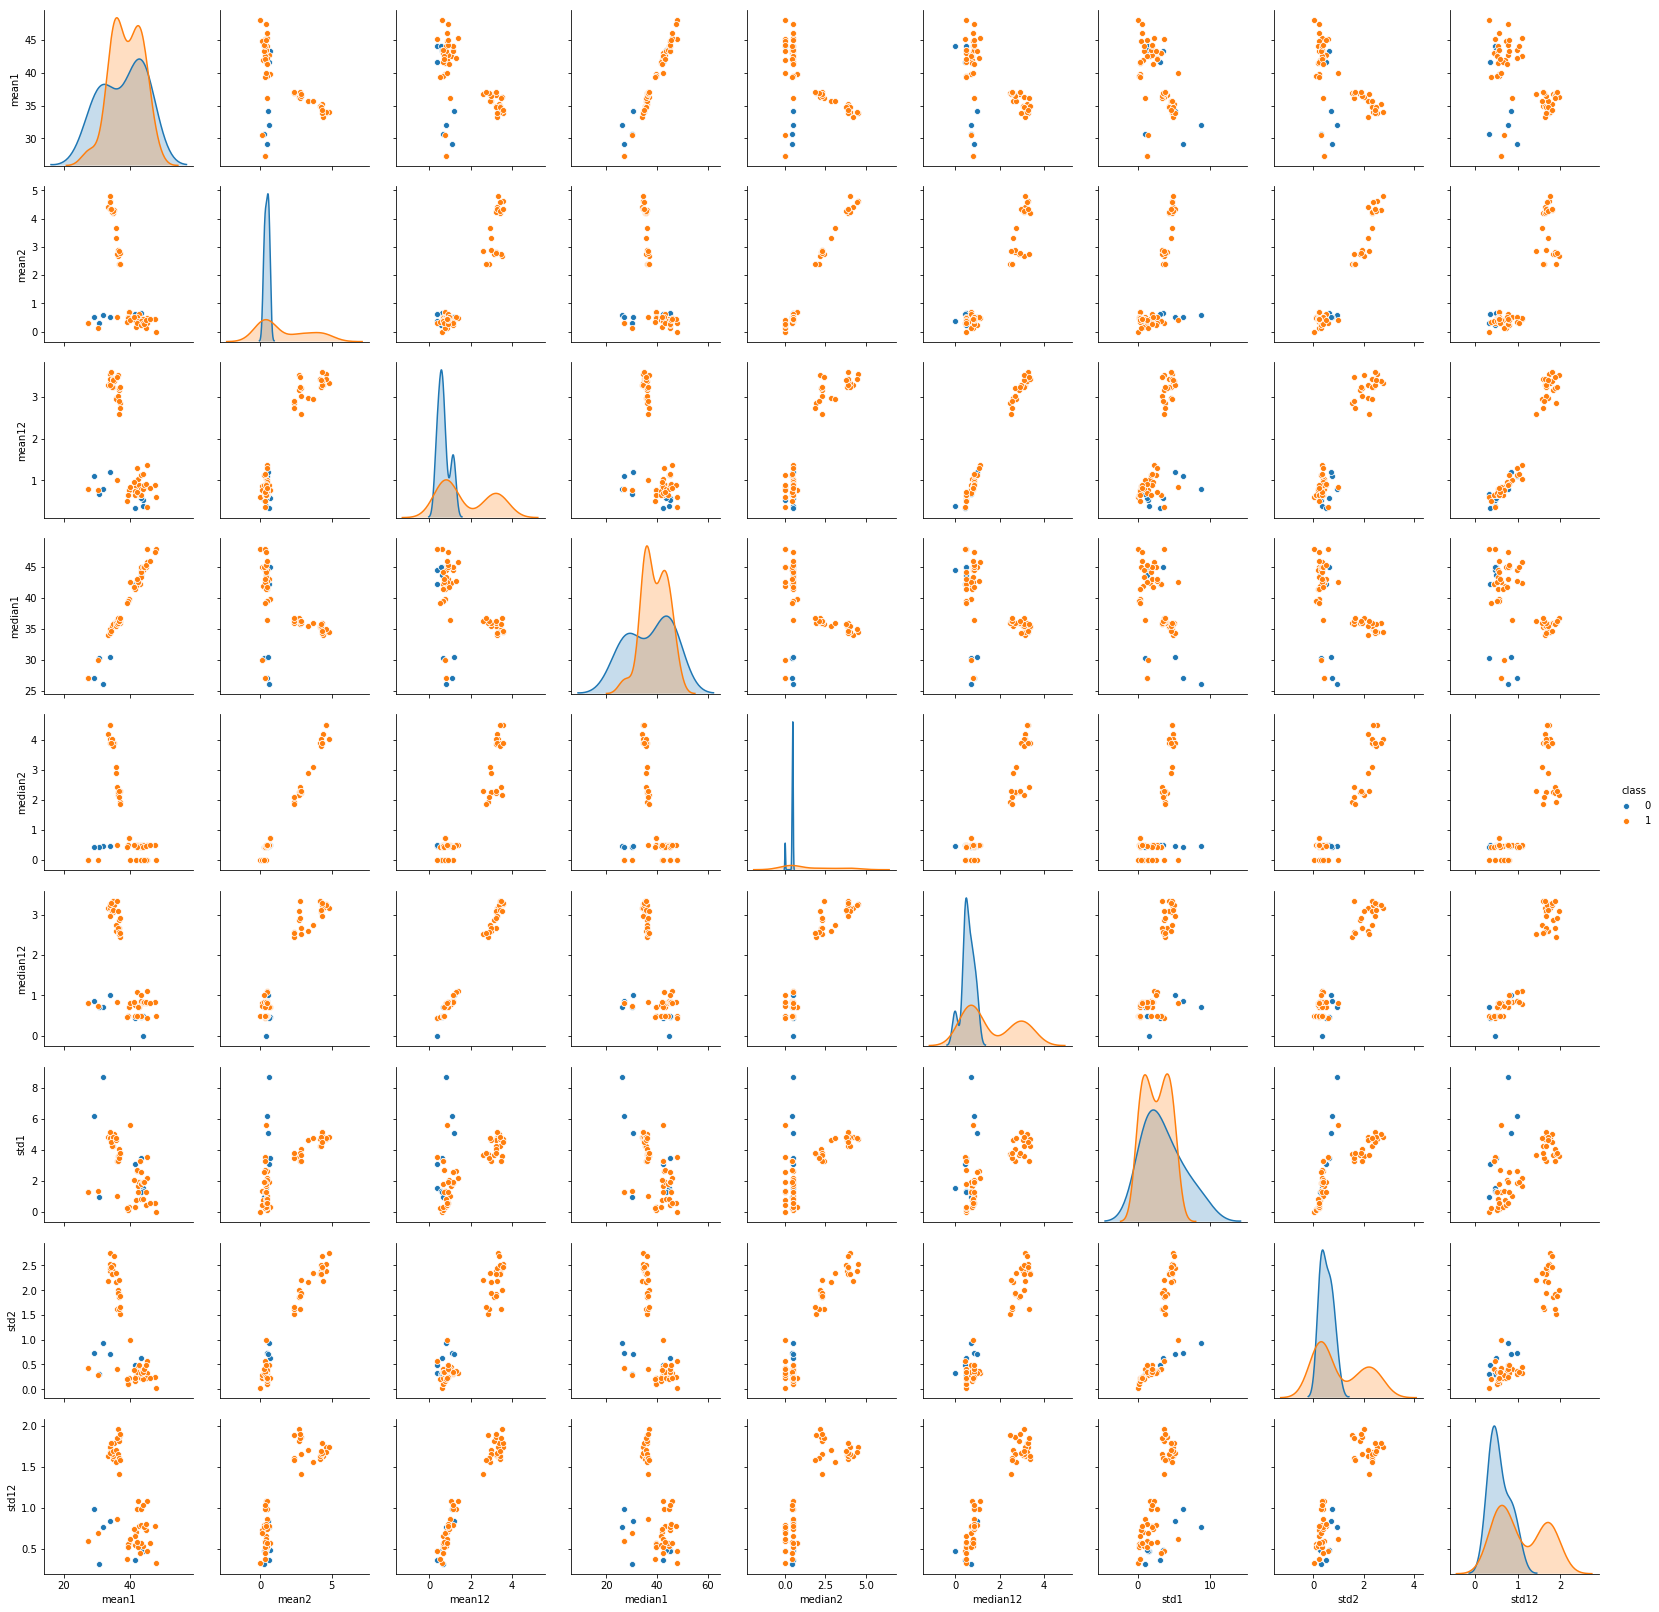

In [593]:
plot_l2=sns.pairplot(temp_df_l2,vars=['mean1','mean2','mean12','median1','median2','median12','std1','std2','std12'],hue='class')
plot_l2.savefig('scatterplot_hw3_l2.png')

In [383]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [402]:
accuracy_list=[]
l=1
l_p_values={}
l_p_list=[]
indices_list=[]
for df in c:
    indices=[]
    model=LogisticRegression(solver="liblinear") #creating a logistic regression model for each l value
    selector = RFECV(model, step=1, cv=5) #performing RFE in steps of 1
    X=df.iloc[:,0:-1]
    y=df.iloc[:,-1]
    selector=selector.fit(X,y)
    for ind in range(len(selector.support_)): 
        if selector.support_[ind]==True:  #extracting indices of only features which are important
            indices.append(ind)

    l_p_values[l]=len(indices)
    l_p_list.append(l_p_values)
    indices_list.append(indices)
    #print(l_p_values)
    X=X.iloc[:,indices] #creating new train data with only the important features
    new_model=LogisticRegression(solver="liblinear").fit(X,y) #fitting the logistic regression model to new trainset
    accuracy_list.append([l,max(selector.grid_scores_)]) #estimating accuracy scores of RFE trainset
    l+=1
    
print(accuracy_list)   
print(l_p_list)    
print(indices_list)   
        
        
    

[[1, 0.9857142857142858], [2, 0.9857142857142858], [3, 1.0], [4, 0.9857142857142858], [5, 0.9857142857142858], [6, 0.9714285714285715], [7, 0.9857142857142858], [8, 0.9703296703296704], [9, 0.9857142857142858], [10, 0.9714285714285715], [11, 0.9714285714285715], [12, 0.9714285714285715], [13, 0.9714285714285715], [14, 0.9714285714285715], [15, 0.9714285714285715], [16, 0.9714285714285715], [17, 0.9714285714285715], [18, 0.9857142857142858], [19, 0.9714285714285715], [20, 0.9714285714285715]]
[{1: 4, 2: 4, 3: 4, 4: 5, 5: 19, 6: 5, 7: 22, 8: 4, 9: 45, 10: 13, 11: 5, 12: 5, 13: 4, 14: 53, 15: 44, 16: 7, 17: 14, 18: 9, 19: 6, 20: 41}, {1: 4, 2: 4, 3: 4, 4: 5, 5: 19, 6: 5, 7: 22, 8: 4, 9: 45, 10: 13, 11: 5, 12: 5, 13: 4, 14: 53, 15: 44, 16: 7, 17: 14, 18: 9, 19: 6, 20: 41}, {1: 4, 2: 4, 3: 4, 4: 5, 5: 19, 6: 5, 7: 22, 8: 4, 9: 45, 10: 13, 11: 5, 12: 5, 13: 4, 14: 53, 15: 44, 16: 7, 17: 14, 18: 9, 19: 6, 20: 41}, {1: 4, 2: 4, 3: 4, 4: 5, 5: 19, 6: 5, 7: 22, 8: 4, 9: 45, 10: 13, 11: 5, 12: 5,

In [398]:
import scipy.stats as stat


In [623]:
X_tr=c[2].iloc[:,indices_list[2]]
y_tr=c[2].iloc[:,-1]
model_new=LogisticRegression(solver="liblinear").fit(X_tr,y_tr)

In [625]:
#selecting l=3 because it has highest highest score

denom = (2.0*(1.0+np.cosh(model_new.decision_function(X_tr))))
denom = np.tile(denom,(X_tr.shape[1],1)).T
F_ij = np.dot((X_tr/denom).T,X_tr) ## Fisher Information Matrix
Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
z_scores = model_new.coef_[0]/sigma_estimates # z-score for each model coefficient
p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values

print(p_values)

    
    
    

[0.41104632043535483, 0.09562082333984656, 0.0660317451580397, 0.46032413121641846]


In [415]:
def load_newdata_bending1_test(directory):
    c=1
    dataframes1=[]
    while c<8:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        if file[0]=="dataset1.csv" or file[0]=="dataset2.csv":
            data=pd.read_csv(x,skiprows=4)
            dataframes1.append(data)
        c=c+1
    return dataframes1
        


In [433]:
path='C:/Users/Shivani/bending1'
bending_df_test_list=load_newdata_bending1_test(path)
print(len(bending_df_test_list))


2


In [423]:
def load_newdata_bending2_test(directory):
    c=1
    dataframes2=[]
    while c<7:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        if file[0]=="dataset1.csv" or file[0]=="dataset2.csv":
            data=pd.read_csv(x,skiprows=4)
            dataframes2.append(data)
        c=c+1
    return dataframes2
        


In [434]:
path='C:/Users/Shivani/bending2'
bending_df2_test_list=load_newdata_bending2_test(path)
print(len(bending_df2_test_list))


2


In [425]:
def load_newdata_rest_test(directory):
    c=1
    data_store=[]
    while c<16:
        file=os.listdir(directory)[c-1:c]
        x=directory+'/'+file[0]
        if file[0]=="dataset1.csv" or file[0]=="dataset2.csv" or file[0]== "dataset3.csv":
            dataset=pd.read_csv(x,skiprows=4)

            data_store.append(dataset)
        c=c+1
            

    return data_store

In [435]:
path='C:/Users/Shivani/cycling'
o1_test_list=load_newdata_rest_test(path)
print(len(o1_test_list))


3


In [436]:
path='C:/Users/Shivani/lying'
o2_test_list=load_newdata_rest_test(path)
print(len(o2_test_list))


3


In [437]:
path='C:/Users/Shivani/sitting'
o3_test_list=load_newdata_rest_test(path)
print(len(o3_test_list))


3


In [438]:
path='C:/Users/Shivani/standing'
o4_test_list=load_newdata_rest_test(path)
print(len(o4_test_list))


3


In [439]:
path='C:/Users/Shivani/walking'
o5_test_list=load_newdata_rest_test(path)
print(len(o5_test_list))


3


In [613]:
def final_processing_testdata():
    params=[bending_df_test_list,bending_df2_test_list,o1_test_list,o2_test_list,o3_test_list,o4_test_list,o5_test_list]
    list_of_all_dfs=[]
    for l in range(1,21):
        temp_list=[]
        for param in params:
            temp_name=print_df(param,l)
            if param is bending_df_test_list or param is bending_df2_test_list:
                temp_name['class']=0
            else:
                temp_name['class']=1
            temp_list.append(temp_name)
        resulting_df=pd.concat(temp_list)
        list_of_all_dfs.append(resulting_df)
    return list_of_all_dfs

In [626]:
c_testdata=final_processing_testdata()

In [627]:
c_testdata[0]

,min1,min2,min3,min4,min5,min6,max1,max2,max3,max4,...,1st quart4,1st quart5,1st quart6,3rd quart1,3rd quart2,3rd quart3,3rd quart4,3rd quart5,3rd quart6,class
0,37.25,0.0,4.00,0.0,27.25,0.0,45.00,1.30,29.50,7.23,...,0.00,33.00,0.00,42.00,0.50,23.25,1.12,36.00,1.30,0
0,38.00,0.0,2.00,0.0,27.67,0.0,45.67,1.22,29.50,5.76,...,0.00,32.00,0.00,43.67,0.50,22.25,1.15,34.50,1.30,0
0,12.75,0.0,0.00,0.0,10.67,0.0,51.00,6.87,25.33,6.76,...,0.00,20.50,0.43,26.50,0.71,22.00,0.87,27.00,0.87,0
0,0.00,0.0,7.50,0.0,0.00,0.0,42.75,7.76,35.00,5.76,...,0.00,15.00,0.47,30.00,0.50,22.50,0.94,20.75,1.30,0
0,24.25,0.0,5.50,0.0,7.00,0.0,45.00,8.58,26.75,8.05,...,1.64,17.95,1.50,40.25,3.13,19.00,3.92,21.75,3.90,1
0,28.75,0.0,6.50,0.0,10.50,0.0,44.75,9.91,24.67,8.32,...,1.79,18.00,1.41,40.25,2.87,19.50,4.03,21.50,3.77,1
0,22.00,0.0,6.33,0.0,7.50,0.0,44.67,14.17,24.00,9.74,...,1.79,16.00,1.50,40.06,3.35,19.00,4.00,21.00,4.15,1
0,23.50,0.0,0.00,0.0,0.00,0.0,30.00,1.79,13.25,5.02,...,0.43,5.50,0.43,29.00,0.50,8.33,1.26,10.75,1.00,1
0,24.75,0.0,1.00,0.0,0.00,0.0,48.33,3.11,16.50,5.91,...,0.00,2.00,0.32,48.00,0.00,7.50,0.71,5.54,0.94,1
0,48.00,0.0,0.00,0.0,0.00,0.0,48.25,0.43,13.00,2.86,...,0.00,4.67,0.46,48.00,0.00,6.25,0.50,10.00,0.83,1


In [628]:
X_test=c_testdata[2].iloc[:,indices_list[2]]
y_test=c_testdata[2].iloc[:,-1]

In [629]:
y_pred_train=model_new.predict(X_tr)

In [630]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model_new.score(X_tr, y_tr)))

Accuracy of logistic regression classifier on train set: 1.00


In [631]:
y_pred_test = model_new.predict(X_test)

In [632]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_new.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [469]:
from sklearn.metrics import confusion_matrix

In [633]:
confusion_matrix_train=confusion_matrix(y_tr,y_pred_train)
print(confusion_matrix_train)

[[ 9  0]
 [ 0 60]]


In [634]:

confusion_matrix_test = confusion_matrix(y_test, y_pred_test) #confusion matrix for test data
print(confusion_matrix_test)

[[ 4  0]
 [ 0 15]]


In [474]:
import matplotlib.pyplot as plt

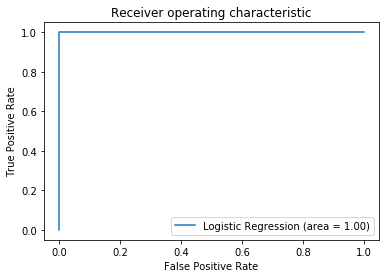

1.0


In [477]:
#ROC and AUC for trainset
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y,y_pred_train)
fpr_train, tpr_train, thresholds_train= roc_curve(y,y_pred_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_trainset')
plt.show()
print(logit_roc_auc_train)

In [481]:
model_new.coef_

array([[-0.52953963, -0.84280069,  0.55646301,  0.46942289]])

In [482]:
p_values

[0.41104632043535483,
 0.09562082333984656,
 0.0660317451580397,
 0.46032413121641846]

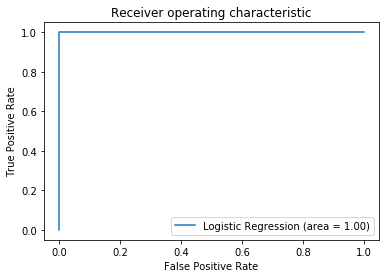

1.0


In [483]:
#ROC and AUC for test set
logit_roc_auc_test = roc_auc_score(y_test,y_pred_test)
fpr_test, tpr_test, thresholds_test= roc_curve(y_test,y_pred_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_trainset')
plt.show()
print(logit_roc_auc_test)

In [ ]:

from sklearn import linear_model

In [504]:
#1e
accuracy_list_l1=[]
l_l1=1
l_lambda={}
l_lambda_list=[]
l_coeff={}
indices_list_l1=[]
for df in c:
    indices_l1=[]
    X=df.iloc[:,0:-1]
    y=df.iloc[:,-1]
    lassocv = linear_model.LassoCV(cv=5,fit_intercept=True,normalize=True,max_iter=5000,tol=0.01)
    lassocv.fit(X, y)
    for ind in range(len(lassocv.coef_)): 
        if lassocv.coef_[ind]!=0:  #extracting indices of only features which are important
            indices_l1.append(ind)

    lassocv_score = lassocv.score(X, y)
    accuracy_list_l1.append([l_l1,lassocv_score])
    lassocv_alpha = lassocv.alpha_ #getting the lambda values
    l_lambda[l_l1]=lassocv_alpha
    indices_list_l1.append(indices_l1)
    #lassocv_coeff=lassocv.coef_
    #l_coeff[l_l1]=lassocv_coeff
    #l_lambda_list.append(l_lambda)
    #X=X.iloc[:,indices_l1] #creating new train data with only the important features
    #lassocv_new=linear_model.LassoCV(cv=5,fit_intercept=True,normalize=True,max_iter=100000,tol=0.01) #fitting the logistic regression model to new trainset
    
    l_l1+=1
    
print(accuracy_list_l1)   
print(l_lambda)  
print(indices_list_l1)

       
        
    

c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[[1, 0.24750326191805783], [2, 0.18713513343803823], [3, 0.12971679488731902], [4, 0.12886176111201364], [5, 0.17431961869026236], [6, 0.2341934703538633], [7, 0.18307452979850825], [8, 0.17858947498299427], [9, 0.18359956474141925], [10, 0.183934922076607], [11, 0.23995479058562275], [12, 0.24842495590948932], [13, 0.19677643000198664], [14, 0.24250807537014152], [15, 0.1865227250952406], [16, 0.1880328447241576], [17, 0.24762531333560012], [18, 0.2634222448996122], [19, 0.31100571832640767], [20, 0.30851833059319356]]
{1: 0.02332920067176748, 2: 0.024324077121372637, 3: 0.02573552925374789, 4: 0.02478249680688819, 5: 0.02347641833345433, 6: 0.022148319630647843, 7: 0.024058728421630236, 8: 0.023426070630597356, 9: 0.024093202440392807, 10: 0.024115196354022962, 11: 0.022970693537961728, 12: 0.023372598893194596, 13: 0.02483960180076533, 14: 0.023092582177297396, 15: 0.024224539435446706, 16: 0.024382350181213156, 17: 0.02289095471572931, 18: 0.023674590359382203, 19: 0.02192293101368

In [557]:
#best accuracy score is 0.311 and the corresponding l is 19
X_l1=c[18].iloc[:,indices_list_l1[18]]
y_l1=c[18].iloc[:,-1]
model_l1=LogisticRegression(penalty='l1',solver="liblinear").fit(X_l1,y_l1)




In [636]:
y_predicted=model_l1.predict(X_l1)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model_l1.score(X_l1, y_l1)))

Accuracy of logistic regression classifier on train set: 0.97


In [635]:
X_l1_test=c_testdata[18].iloc[:,indices_list_l1[18]]
y_l1_test=c_testdata[18].iloc[:,-1]
y_predicted_test=model_l1.predict(X_l1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_l1.score(X_l1_test, y_l1_test)))


Accuracy of logistic regression classifier on test set: 0.95


In [510]:
#for creating multiclass
def final_processing_multiclass():
    params=[bending_df_tr_list,bending_df2_tr_list,o1_tr_list,o2_tr_list,o3_tr_list,o4_tr_list,o5_tr_list]
    list_of_all_dfs=[]
    for l in range(1,21):
        temp_list=[]
        for param in params:
            temp_name=print_df(param,l)
            if param is bending_df_tr_list: 
                temp_name['class']=1
            elif param is bending_df2_tr_list:
                temp_name['class']=2
            elif param is o1_tr_list:
                temp_name['class']=7
            elif param is o2_tr_list:
                temp_name['class']=4
            elif param is o3_tr_list:
                temp_name['class']=5
            elif param is o4_tr_list:
                temp_name['class']=6
            elif param is o5_tr_list:
                temp_name['class']=3
            
            temp_list.append(temp_name)
        resulting_df=pd.concat(temp_list)
        list_of_all_dfs.append(resulting_df)
    return list_of_all_dfs
    

In [511]:
c_multiclass=final_processing_multiclass()

In [564]:
def final_processing_testdata_multiclass():
    params=[bending_df_test_list,bending_df2_test_list,o1_test_list,o2_test_list,o3_test_list,o4_test_list,o5_test_list]
    list_of_all_dfs=[]
    for l in range(1,21):
        temp_list=[]
        for param in params:
            temp_name=print_df(param,l)
            if param is bending_df_test_list: 
                temp_name['class']=1
            elif param is bending_df2_test_list:
                temp_name['class']=2
            elif param is o1_test_list:
                temp_name['class']=3
            elif param is o2_test_list:
                temp_name['class']=4
            elif param is o3_test_list:
                temp_name['class']=5
            elif param is o4_test_list:
                temp_name['class']=6
            elif param is o5_test_list:
                temp_name['class']=7
                
            temp_list.append(temp_name)
        resulting_df=pd.concat(temp_list)
        list_of_all_dfs.append(resulting_df)
    return list_of_all_dfs

In [565]:
c_testdata_multiclass=final_processing_testdata_multiclass()

In [525]:
accuracy_list_l1_multiclass=[]
l_l1_multiclass=1
l_lambda_multiclass={}
l_lambda_list_multiclass=[]

indices_list_l1_mc=[]
for df in c_multiclass:
    indices_l1_multiclass=[]
    X=df.iloc[:,0:-1]
    y=df.iloc[:,-1]
    lassocv_multiclass = linear_model.LassoCV(cv=5,fit_intercept=True,normalize=True,max_iter=5000,tol=0.01)
    lassocv_multiclass.fit(X, y)
    for ind in range(len(lassocv_multiclass.coef_)): 
        if lassocv_multiclass.coef_[ind]!=0:  #extracting indices of only features which are important
            indices_l1_multiclass.append(ind)

    lassocv_score_mc = lassocv_multiclass.score(X, y)
    accuracy_list_l1_multiclass.append([l_l1_multiclass,lassocv_score_mc])
    lassocv_alpha_mc = lassocv_multiclass.alpha_ #getting the lambda values
    l_lambda_multiclass[l_l1_multiclass]=lassocv_alpha_mc
    indices_list_l1_mc.append(indices_l1_multiclass)
    #lassocv_coeff=lassocv.coef_
    #l_coeff[l_l1]=lassocv_coeff
    #l_lambda_list.append(l_lambda)
    #X=X.iloc[:,indices_l1] #creating new train data with only the important features
    #lassocv_new=linear_model.LassoCV(cv=5,fit_intercept=True,normalize=True,max_iter=100000,tol=0.01) #fitting the logistic regression model to new trainset
    
    l_l1_multiclass+=1
    
print(accuracy_list_l1_multiclass)   
print(l_lambda_multiclass)    


c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shivani\appdata\local\programs\python\python36\lib\site-packa

[[1, 0.9413475962985461], [2, 0.0], [3, 0.0], [4, 0.0], [5, 2.220446049250313e-16], [6, 2.220446049250313e-16], [7, 0.0], [8, 0.0], [9, 0.0], [10, 0.0], [11, 0.0], [12, 2.220446049250313e-16], [13, 0.0], [14, 2.220446049250313e-16], [15, 0.0], [16, 2.220446049250313e-16], [17, 0.0], [18, 3.3306690738754696e-16], [19, 0.0], [20, 2.220446049250313e-16]]
{1: 0.00010482427673134781, 2: 0.09709737799334577, 3: 0.09679300662492206, 4: 0.10509075408710794, 5: 0.10251546229272478, 6: 0.1011669514547355, 7: 0.10469977307106434, 8: 0.11146423300214177, 9: 0.11303811383883762, 10: 0.1088467138841502, 11: 0.10691784121341534, 12: 0.1054089593125262, 13: 0.1099257648521349, 14: 0.11237808354118149, 15: 0.11149391617477279, 16: 0.10943986224947225, 17: 0.10621769408630966, 18: 0.11397282135782355, 19: 0.11169949482882653, 20: 0.11201916235909672}


In [527]:
#selecting l=1 as it has the highest accuracy score of 0.94
X_l1_mc=c_multiclass[0].iloc[:,indices_list_l1_mc[0]]
y_l1_mc=c_multiclass[0].iloc[:,-1]
model_l1_multiclass=LogisticRegression(penalty='l1',solver="saga",multi_class='multinomial',max_iter=1000).fit(X_l1_mc,y_l1_mc)


c:\users\shivani\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [637]:
y_predicted_mc=model_l1_multiclass.predict(X_l1_mc)
print('Accuracy of multinomial logistic regression classifier on train set: {:.2f}'.format(model_l1_multiclass.score(X_l1_mc, y_l1_mc)))

Accuracy of multinomial logistic regression classifier on train set: 1.00


In [639]:
X_mc_test=c_testdata_multiclass[0].iloc[:,indices_list_l1_mc[0]]
y_mc_test=c_testdata_multiclass[0].iloc[:,-1]

In [640]:
y_predicted_mc_test=model_l1_multiclass.predict(X_mc_test)
print('Accuracy of multinomial logistic regression classifier on test set: {:.2f}'.format(model_l1_multiclass.score(X_mc_test, y_mc_test)))

Accuracy of multinomial logistic regression classifier on test set: 0.79


In [641]:
#confusion matrix for traindata of multiclass
confusion_matrix_train_mc=confusion_matrix(y_l1_mc,y_predicted_mc)
print(confusion_matrix_train_mc)

[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]


In [642]:
#confusion matrix for testdata of multiclass
confusion_matrix_test_mc = confusion_matrix(y_mc_test, y_predicted_mc_test) #confusion matrix for test data
print(confusion_matrix_test_mc)

[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 2 0 0 0 1]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


In [643]:
#calculating test error
testerror=np.mean(y_predicted_mc_test!=y_mc_test)
print(testerror)

0.21052631578947367


In [571]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

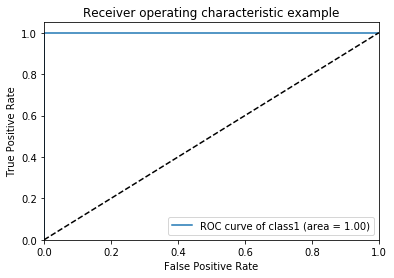

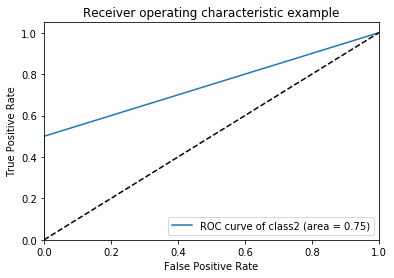

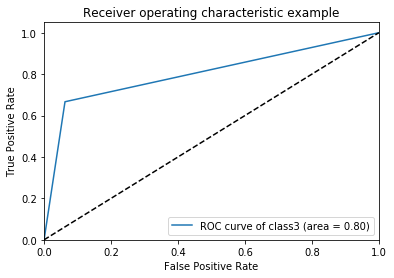

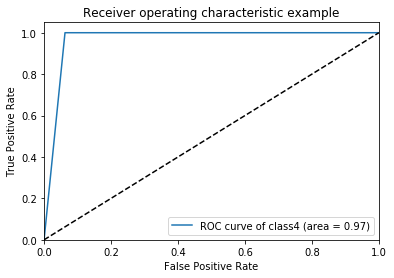

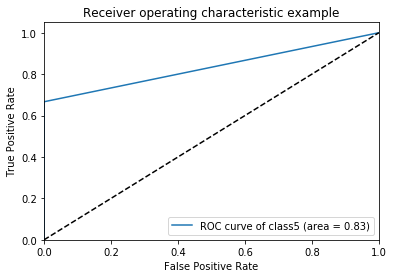

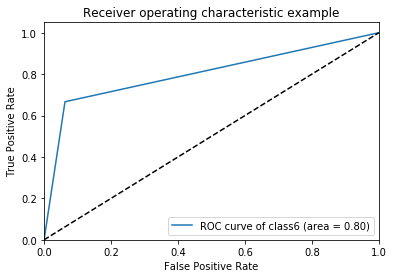

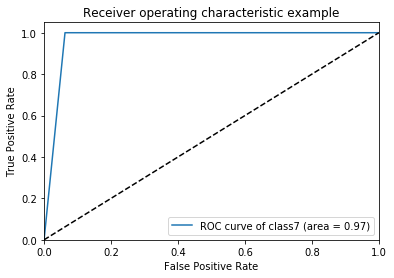

In [573]:
#plotting ROC curve for each class
y_test_bina=label_binarize(y_mc_test,classes=[1,2,3,4,5,6,7])
y_test_pred_bina=label_binarize(y_predicted_mc_test,classes=[1,2,3,4,5,6,7])
n_classes=7
fpr_mc = dict()
tpr_mc = dict()
roc_auc_mc = dict()
for i in range(n_classes):
    fpr_mc[i], tpr_mc[i], _ = roc_curve(y_test_bina[:, i], y_test_pred_bina[:, i])
    roc_auc_mc[i] = auc(fpr_mc[i], tpr_mc[i])
    plt.figure()
    plt.plot(fpr_mc[i], tpr_mc[i], label='ROC curve of class{0} (area = {1:0.2f})' ''.format(i+1,roc_auc_mc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig("ROC curves multiclass.jpg")

In [574]:
from sklearn.naive_bayes import GaussianNB

In [644]:
accuracy_list_nb_g=[]
l_nb_g=1
for df in c_multiclass:
    X=df.iloc[:,0:-1]
    y=df.iloc[:,-1]
    gnb = GaussianNB().fit(X,y)
    gnb_score = gnb.score(X, y)
    accuracy_list_nb_g.append([l_nb_g,gnb_score])
    l_nb_g+=1
print(accuracy_list_nb_g)
    
    
    


[[1, 1.0], [2, 1.0], [3, 0.9855072463768116], [4, 1.0], [5, 0.9855072463768116], [6, 0.9710144927536232], [7, 1.0], [8, 0.9855072463768116], [9, 1.0], [10, 1.0], [11, 0.9855072463768116], [12, 1.0], [13, 1.0], [14, 1.0], [15, 1.0], [16, 1.0], [17, 1.0], [18, 1.0], [19, 1.0], [20, 1.0]]


In [645]:
#selecting best l as 1
X_nb_g=c_multiclass[0].iloc[:,0:-1]
y_nb_g=c_multiclass[0].iloc[:,-1]
clf_nb_g=GaussianNB().fit(X_nb_g,y_nb_g)

In [646]:
y_pred_nb_g=clf_nb_g.predict(X_nb_g) #predicting on trainset
print('Accuracy of Naive Bayes classifier on train set: {:.2f}'.format(clf_nb_g.score(X_nb_g, y_nb_g)))

Accuracy of Naive Bayes classifier on train set: 1.00


In [647]:
X_nb_g_test=c_testdata_multiclass[0].iloc[:,0:-1]
y_nb_g_test=c_testdata_multiclass[0].iloc[:,-1]

In [648]:
y_pred_nb_g_test=clf_nb_g.predict(X_nb_g_test) #predicting on testset
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf_nb_g.score(X_nb_g_test, y_nb_g_test)))

Accuracy of Naive Bayes classifier on test set: 0.89


In [603]:
#confusion matrix for traindata for Naive Bayes (Gaussian priors)
confusion_matrix_train_nb_g=confusion_matrix(y_nb_g,y_pred_nb_g)
print(confusion_matrix_train_nb_g)

[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]


In [604]:
#confusion matrix for testdata for Naive Bayes (multinomial priors)
confusion_matrix_test_nb_g = confusion_matrix(y_nb_g_test, y_pred_nb_g_test) #confusion matrix for test data
print(confusion_matrix_test_nb_g)

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


In [650]:
#calculating test error
testerror_nb_g=np.mean(y_pred_nb_g_test!=y_nb_g_test)
print(testerror_nb_g)

0.10526315789473684


In [576]:
from sklearn.naive_bayes import MultinomialNB

In [651]:
accuracy_list_nb_mn=[]
l_nb_mn=1
for df in c_multiclass:
    X=df.iloc[:,0:-1]
    y=df.iloc[:,-1]
    clf = MultinomialNB().fit(X,y)
    clf_score=clf.score(X,y)
    accuracy_list_nb_mn.append([l_nb_mn,clf_score])
    l_nb_mn+=1
print(accuracy_list_nb_mn)

[[1, 0.927536231884058], [2, 0.8840579710144928], [3, 0.8985507246376812], [4, 0.9130434782608695], [5, 0.927536231884058], [6, 0.9565217391304348], [7, 0.9420289855072463], [8, 0.9420289855072463], [9, 0.9420289855072463], [10, 0.9420289855072463], [11, 0.9420289855072463], [12, 0.9420289855072463], [13, 0.9420289855072463], [14, 0.9420289855072463], [15, 0.9420289855072463], [16, 0.9420289855072463], [17, 0.9420289855072463], [18, 0.9420289855072463], [19, 0.9420289855072463], [20, 0.9420289855072463]]


In [652]:
#selecting l=6 as it has highest accuracy of 0.95
X_nb_mn=c_multiclass[5].iloc[:,0:-1]
y_nb_mn=c_multiclass[5].iloc[:,-1]
clf_nb_mn=MultinomialNB().fit(X_nb_mn,y_nb_mn)

In [653]:
y_pred_nb_mn=clf_nb_mn.predict(X_nb_mn) #predicting on trainset
print('Accuracy of Naive Bayes classifier on train set: {:.2f}'.format(clf_nb_mn.score(X_nb_mn, y_nb_mn)))

Accuracy of Naive Bayes classifier on train set: 0.96


In [654]:
X_nb_mn_test=c_testdata_multiclass[5].iloc[:,0:-1]
y_nb_mn_test=c_testdata_multiclass[5].iloc[:,-1]

In [655]:
y_pred_nb_mn_test=clf_nb_mn.predict(X_nb_mn_test) #predicting on testset
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf_nb_mn.score(X_nb_mn_test, y_nb_mn_test)))

Accuracy of Naive Bayes classifier on test set: 0.74


In [656]:
#confusion matrix for traindata for Naive Bayes (multinomial priors)
confusion_matrix_train_nb_mn=confusion_matrix(y_nb_mn,y_pred_nb_mn)
print(confusion_matrix_train_nb_mn)

[[ 5  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  1 11  0  0]
 [ 0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0 12]]


In [657]:
#confusion matrix for testdata for Naive Bayes (multinomial priors)
confusion_matrix_test_nb_mn = confusion_matrix(y_nb_mn_test, y_pred_nb_mn_test) #confusion matrix for test data
print(confusion_matrix_test_nb_mn)

[[2 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 0 3]]


In [658]:
#calculating test error
testerror_nb_mn=np.mean(y_pred_nb_mn_test!=y_nb_mn_test)
print(testerror_nb_mn)

0.2631578947368421


In [666]:
import math
from math import sqrt
from math import pi
from math import exp

In [667]:
#question 4
def density_func(x,mu_k,sigma):
    return (sqrt(2*pi)*sigma)**-1*exp(-(2*sigma**2)**-1*(x-mu_k))
#both classes
sigma=6
#class 1 is companies that issued dividend
pi_1=0.8
mu_1=10
#class2 is companies that didn't issue dividend
pi_2=0.2
mu_2=0
#computing probabilities
x=4
d_p1=density_func(4,mu_1,sigma)
d_p2=density_func(4,mu_2,sigma)
p_1=(pi_1*d_p1)/(pi_1*d_p1+pi_2*d_p2)
p_2=(pi_2*d_p2)/(pi_1*d_p1+pi_2*d_p2)

#rounding numbers
print("Dividend probability:",round(p_1,2))
print("Non-Dividend probability:",round(p_2,2))



Dividend probability: 0.82
Non-Dividend probability: 0.18
